# Mason-Sheffold-2014

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
alpha = 0.74  # Shear effect parameter from the fit
sigma = 9.8 * 1e-3  # Surface tension in J/m² (dyne/cm to J/m²)
k_B = 1.38e-23  # Boltzmann constant in J/K
T = 298  # Temperature in K
a = 530e-9  # Droplet radius in meters
xi = 0.14  # Coupling parameter from the fit
phi_c = 0.625  # Critical volume fraction
V_drop = (4/3) * np.pi * a**3  # Droplet volume in m^3

In [3]:
phi_T_squared = (3 * k_B * T / a**3) / (2 * np.pi * xi * sigma / a)  # Equation 6

# Equation 5
def phid_star(phi, phi_c, phi_T_squared):
    term1 = phi - phi_c
    term2 = np.sqrt(term1**2 + phi_T_squared)
    return 0.5 * (term1 + term2)

# Equation 10
def Gp_prime(phi, phi_c, alpha, xi, sigma, a):
    # phi_d_star = phid_star(phi, phi_c, phi_T_squared)
    return 6 * alpha * xi * sigma / a * phi * ((phi - phi_c) + np.sqrt((phi - phi_c)**2 + phi_T_squared))

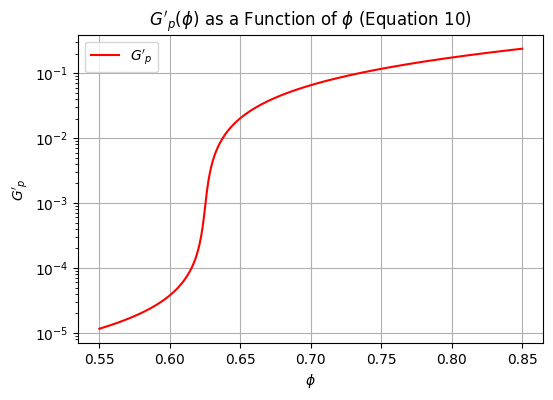

In [4]:
phi_values = np.linspace(0.55, 0.85, 300)

Gp_prime_values = Gp_prime(phi_values, phi_c, alpha, xi, sigma, a)  / (sigma / a)

plt.figure(figsize=(6, 4))
plt.plot(phi_values, Gp_prime_values, label=r"$G'_p$", color='red')
plt.yscale('log')  
plt.title(r"$G'_p(\phi)$ as a Function of $\phi$ (Equation 10)")
plt.xlabel(r'$\phi$')
plt.ylabel(r"$G'_p$")
plt.grid(True)
plt.legend()
plt.show()


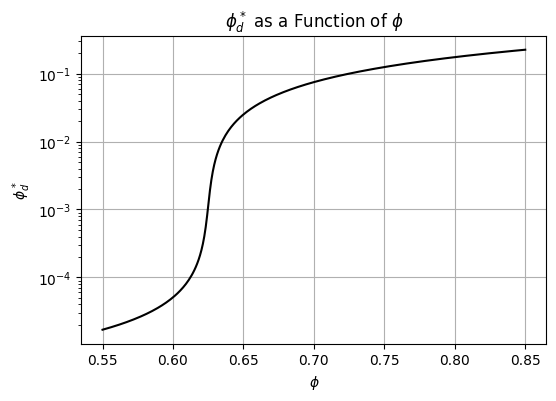

In [5]:
phid_star_values_log = phid_star(phi_values, phi_c, phi_T_squared)

plt.figure(figsize=(6, 4))
plt.plot(phi_values, phid_star_values_log, color='black')
plt.yscale('log') 
plt.title(r'$\phi_d^*$ as a Function of $\phi$')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\phi_d^*$')
plt.grid(True)
plt.show()

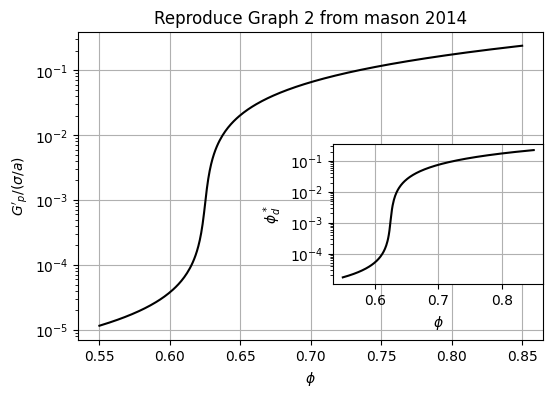

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))

plt.title('Reproduce Graph 2 from mason 2014')
ax.plot(phi_values, Gp_prime_values, label=r"$G'_p/(\sigma/a)$", color='black')
ax.set_yscale('log') 
ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r"$G'_p / (\sigma/a)$")
ax.grid(True)

inset_ax = fig.add_axes([0.55, 0.25, 0.35, 0.35])
inset_ax.plot(phi_values, phid_star_values_log, color='black')
inset_ax.set_yscale('log')
inset_ax.set_xlabel(r'$\phi$', fontsize=10)
inset_ax.set_ylabel(r'$\phi_d^*$', fontsize=10)
inset_ax.grid(True)

plt.show()

In [7]:
# Equation 8
def Pi_phi(phi, phi_c, xi):
    term1 = phi - phi_c
    return 3 * xi * phi**2 * (term1 + np.sqrt(term1**2 + phi_T_squared))

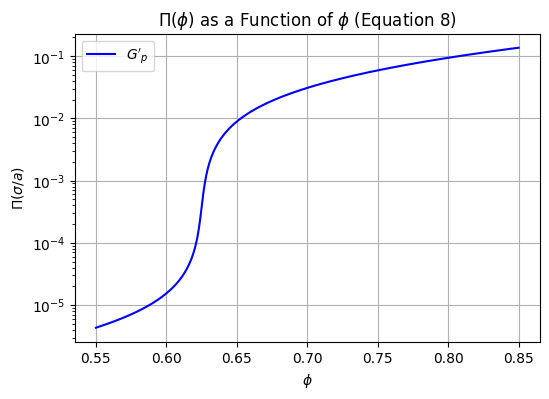

In [10]:
Pi_phi_values = Pi_phi(phi_values, phi_c, xi) 

plt.figure(figsize=(6, 4))
plt.plot(phi_values, Pi_phi_values, label=r"$\Pi$", color='blue')
plt.yscale('log')  
plt.title(r'$\Pi(\phi)$ as a Function of $\phi$ (Equation 8)')
plt.xlabel(r'$\phi$')
plt.ylabel(r"$\Pi(\sigma/a)$")
plt.grid(True)
plt.legend()
plt.show()